# Importing required libraries

In [1]:
from dateutil.parser import parse 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import scipy.stats as sp

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error

#plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Importing the dataset

In [2]:
# Fetching the data
data = pd.read_csv('HH Spot Price.csv')
data.head()

,Unnamed: 0,"Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu)"
0,1997 01,3.45
1,1997 02,2.15
2,1997 03,1.89
3,1997 04,2.03
4,1997 05,2.25


# EDA and Preprocessing the Data

In [3]:
# Changing column names
data.columns = ['Date','Price']
data.tail()
# Data is from Jan 1990 to Dec 2022
# We have 33 years data

,Date,Price
286,2020 11,2.61
287,2020 12,2.59
288,2021 01,2.71
289,2021 02,5.35
290,2021 03,2.62


In [4]:
data.drop(data.tail(3).index,inplace = True)

In [5]:
# Checking data types of the columns as date format is different
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    288 non-null    object 
 1   Price   288 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [41]:
data.describe()

,Price,year
count,288.000000,288.000000
mean,4.182361,2008.500000
std,2.178966,6.934236
min,1.630000,1997.000000
25%,2.647500,2002.750000
50%,3.520000,2008.500000
75%,5.275000,2014.250000
max,13.420000,2020.000000


In [6]:
# Correcting date format
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)
data.head()

,Date,Price
0,1997-01-01,3.45
1,1997-02-01,2.15
2,1997-03-01,1.89
3,1997-04-01,2.03
4,1997-05-01,2.25


'The high rates of unemployment caused by the Great Recession have remained persistently high in recent periods. \nAt the same time, oil prices rose significantly mainly as a result of the increase in demand from China and India.\n\nThe 2008 financial crisis and Great Recession induced a bear market in oil and gas, sending the price of a barrel \nof crude oil from nearly $150 to $35 in just a few months. \nThe recession led to a general drop in asset prices around the world as credit contracted and earnings projections fell.'

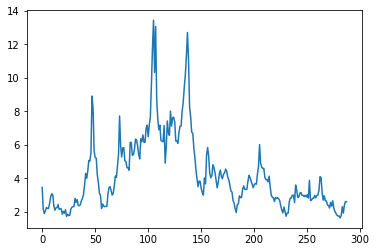

In [7]:
plt.plot(data['Price'])
#plt.plot(data['Price'].ewm(span=15).mean())

'''The high rates of unemployment caused by the Great Recession have remained persistently high in recent periods. 
At the same time, oil prices rose significantly mainly as a result of the increase in demand from China and India.

The 2008 financial crisis and Great Recession induced a bear market in oil and gas, sending the price of a barrel 
of crude oil from nearly $150 to $35 in just a few months. 
The recession led to a general drop in asset prices around the world as credit contracted and earnings projections fell.'''

In [8]:
# Smoothning the Data
#data['Price'] = data['Price'].ewm(span=15).mean()

In [9]:
# Setting the Date column as the index
data = data.set_index('Date')
data

,Price
Date,
1997-01-01,3.45
1997-02-01,2.15
1997-03-01,1.89
1997-04-01,2.03
1997-05-01,2.25
...,...
2020-08-01,2.30
2020-09-01,1.92
2020-10-01,2.39


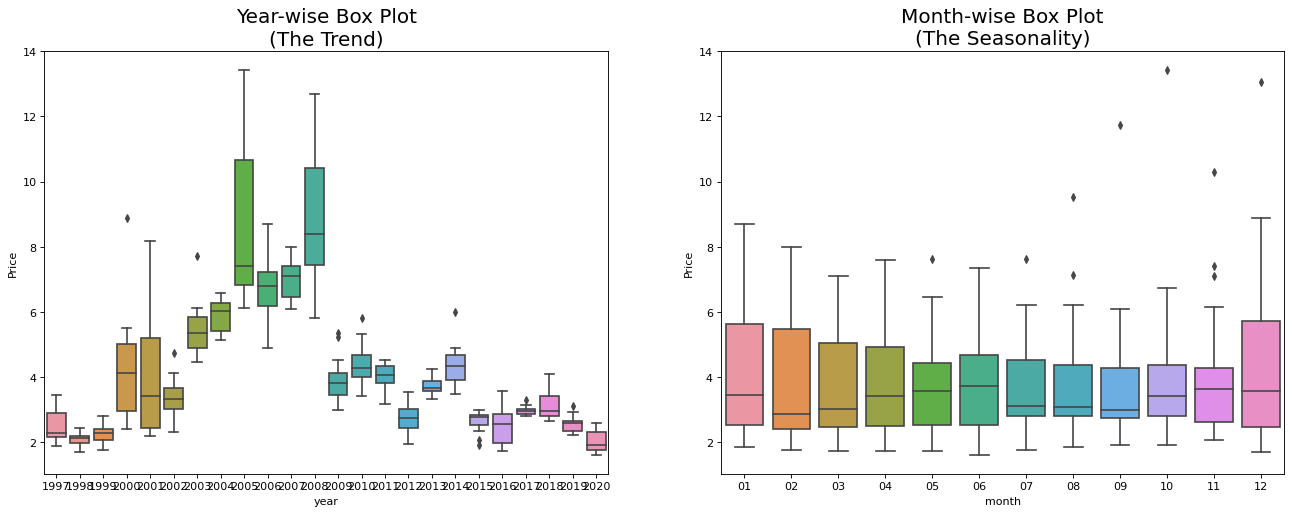

In [10]:
# Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution
# Prepare data
data = data.reset_index()
df = data
df['year'] = [d.year for d in data.Date]
df['month'] = [d.strftime('%m') for d in data.Date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Price', data=df, ax=axes[0])
sns.boxplot(x='month', y='Price', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# There seems to be a trend the data but no seasonality

# Splitting the Data into train and test

In [11]:
train = data.iloc[:int(0.7*len(data))+1,:]
test = data.iloc[int(0.7*len(data))+1:,:]

In [12]:
train

,Date,Price,year,month
0,1997-01-01,3.45,1997,01
1,1997-02-01,2.15,1997,02
2,1997-03-01,1.89,1997,03
3,1997-04-01,2.03,1997,04
4,1997-05-01,2.25,1997,05
...,...,...,...,...
197,2013-06-01,3.83,2013,06
198,2013-07-01,3.62,2013,07
199,2013-08-01,3.43,2013,08
200,2013-09-01,3.62,2013,09


In [13]:
test

,Date,Price,year,month
202,2013-11-01,3.64,2013,11
203,2013-12-01,4.24,2013,12
204,2014-01-01,4.71,2014,01
205,2014-02-01,6.00,2014,02
206,2014-03-01,4.90,2014,03
...,...,...,...,...
283,2020-08-01,2.30,2020,08
284,2020-09-01,1.92,2020,09
285,2020-10-01,2.39,2020,10
286,2020-11-01,2.61,2020,11


# Checking the trend and seasonal decompose of the train data

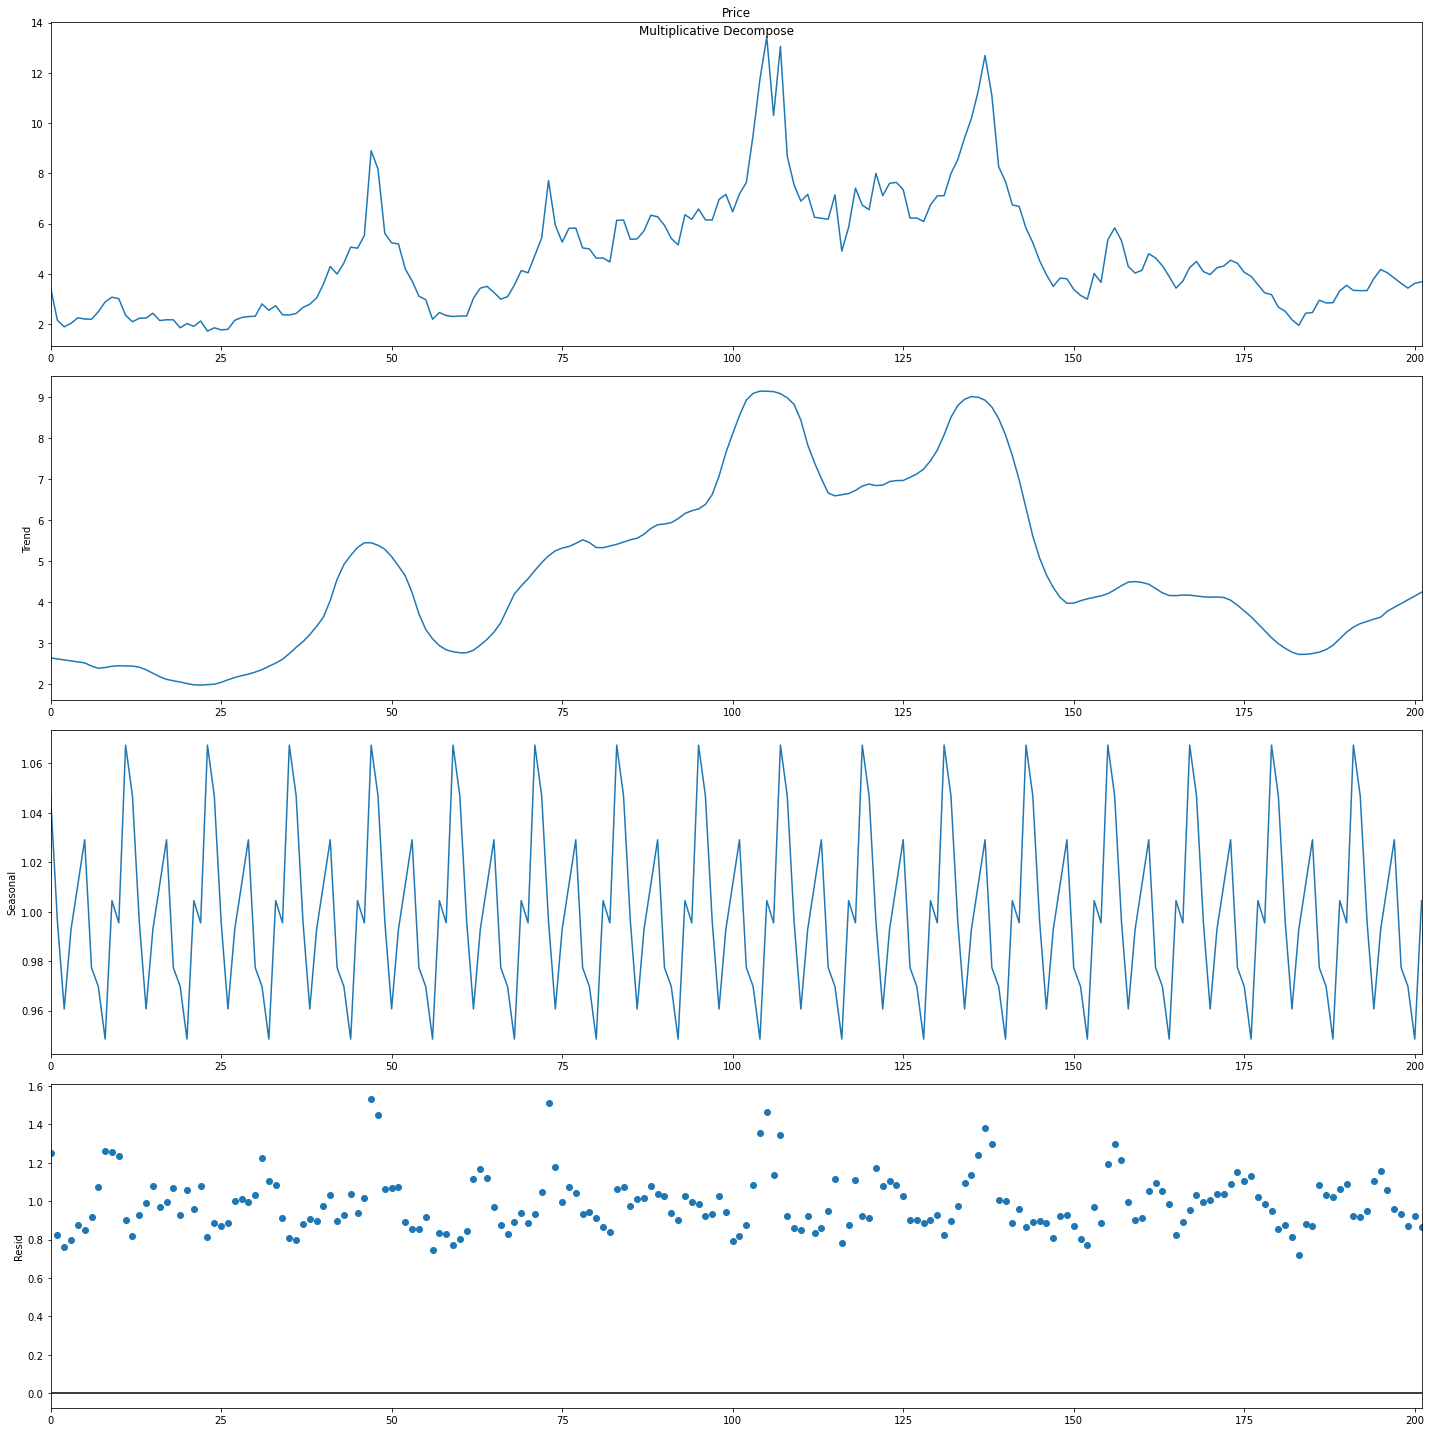

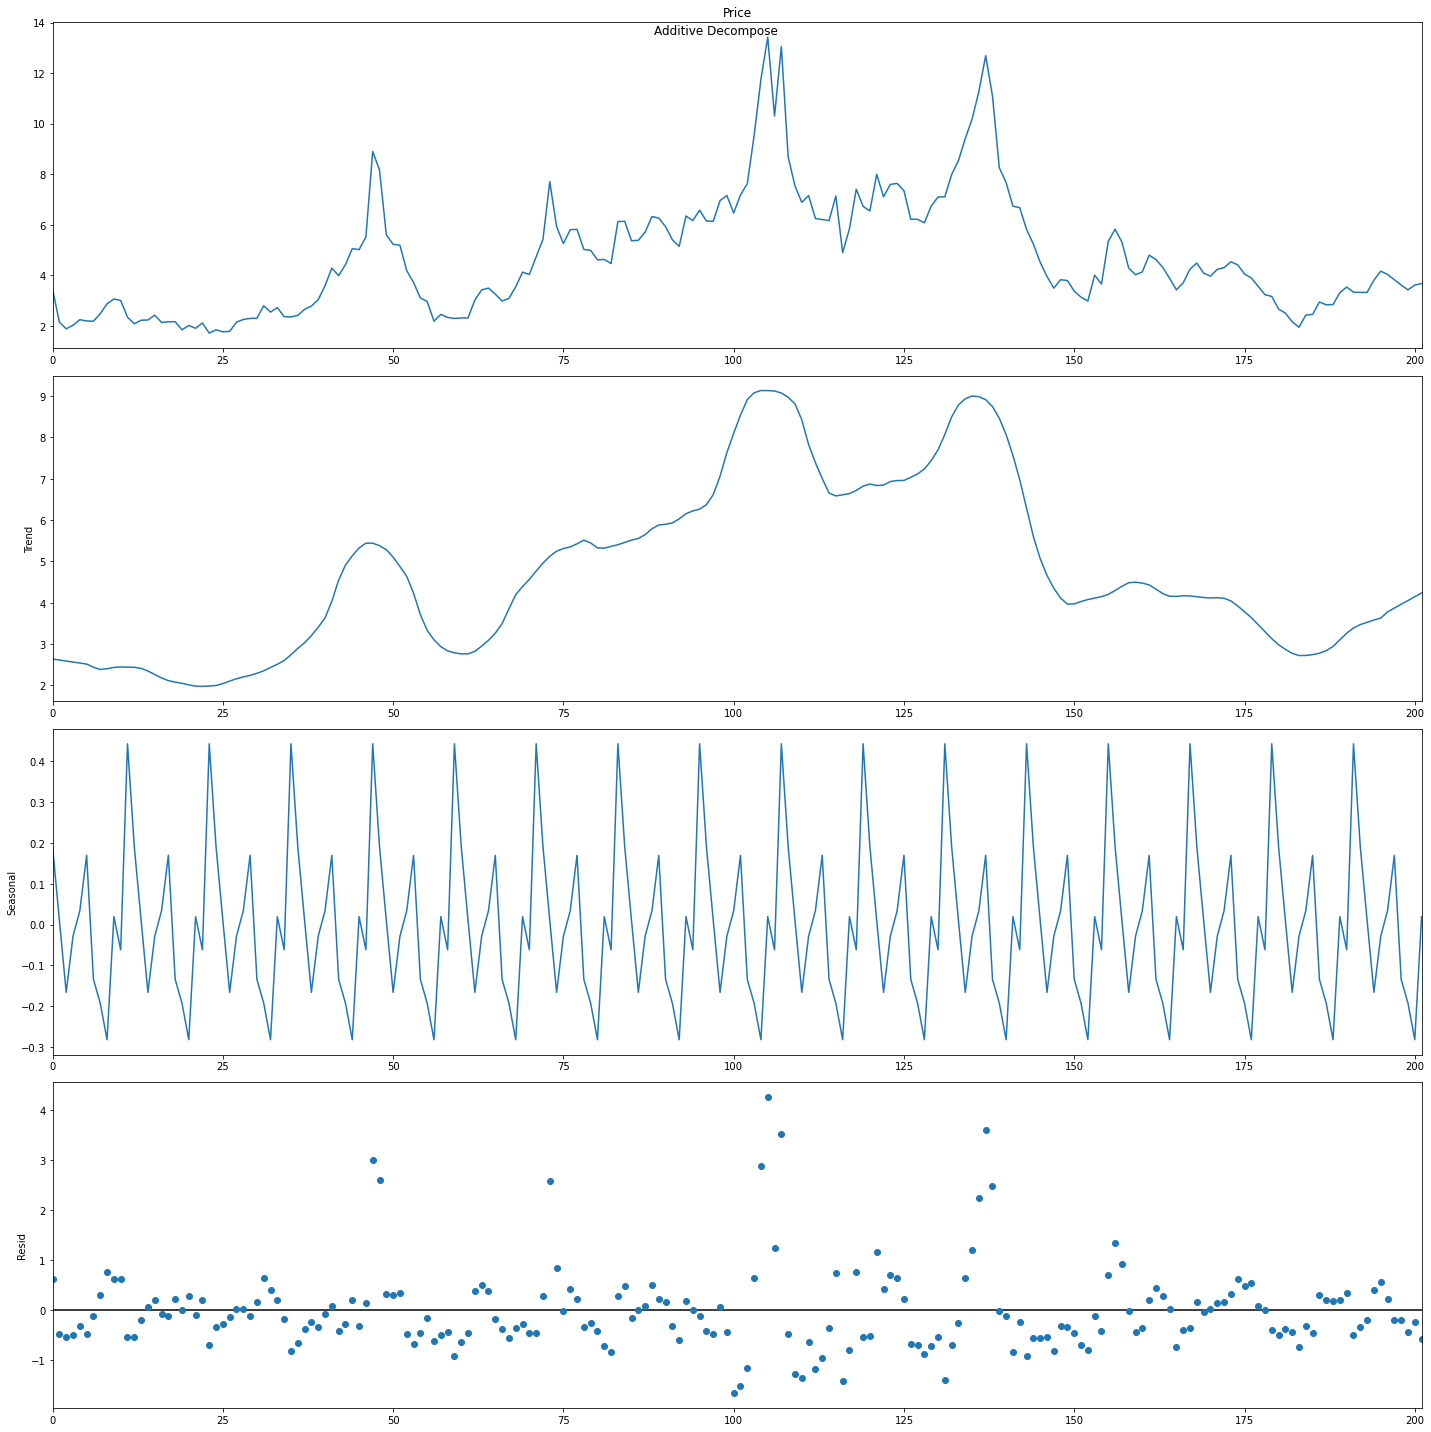

In [14]:
# Additive and multiplicative time series
# Decomposing data into additive and multiplicative components

# Multiplicative Decomposition 
result_mul = seasonal_decompose(train['Price'], period = 12, model='multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition
result_add = seasonal_decompose(train['Price'], period = 12, model='additive', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (20,20)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=12)
result_add.plot().suptitle('Additive Decompose', fontsize=12)
plt.show()

# Since the residuals are better correlated in the multiplicative decompose, we can say that the data
# follows a multiplication decompose and contains both a yearly seasonal and trend element

In [15]:
# Multiplicative components
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed['product'] = df_reconstructed['seas']*df_reconstructed['trend']*df_reconstructed['resid']
df_reconstructed.head()

,seas,trend,resid,actual_values,product
0,1.046947,2.638378,1.248986,3.45,3.45
1,0.996164,2.614192,0.825601,2.15,2.15
2,0.960668,2.590006,0.759605,1.89,1.89
3,0.992899,2.565821,0.796828,2.03,2.03
4,1.011074,2.541635,0.875561,2.25,2.25


# ADF and KPSS Test

In [16]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller, kpss

# H0: Not stationary
# Ha: Stationary
# ADF Test
result = adfuller(train.Price.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value>0.05, hence accept null hypothesis, data is not stationary

# H0: Stationary
# Ha: Not Stationary
# KPSS Test - Trend Stationarity
result = kpss(train.Price.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value<0.05, hence reject null hypothesis, data is not stationary

ADF Statistic: -2.569457032332518
p-value: 0.09947560343279555
Critial Values:
   1%, -3.4633090972761744
Critial Values:
   5%, -2.876029332045744
Critial Values:
   10%, -2.5744932593252643

KPSS Statistic: 0.370762
p-value: 0.089758
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


# De-trending the data

**Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.**  
  
- Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.  
- Subtract the trend component obtained from time series decomposition we saw earlier.  
  
- Subtract the mean  
  
- Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

In [17]:
# Given data follows a stochastic trend that is increase and decrease in values does not follow a consistent pattern

# Detrending using difference method
#create a differenced series
def difference(dataset,interval=1):
    diff=list()
    for i in range(interval,len(dataset)):
        value=dataset[i]-dataset[i-interval]
        diff.append(value)
    return (diff)

#df_detrend=difference(train['Price'])
#df_detrend_1=difference(df_detrend)
#plt.plot(df_detrend,label = 'Detrended Data')
#plt.plot(df_detrend_1,label = 'Detrended Data')
#plt.plot(data.Price.values,label='Original Data')
#plt.plot(pd.DataFrame(df_detrend.values).ewm(span=15).mean(),label='EWM')
#plt.legend()

In [18]:
'''# Testing for stationarity on detrended data
from statsmodels.tsa.stattools import adfuller, kpss

# H0: Not stationary
# Ha: Stationary
# ADF Test
result = adfuller(df_detrend, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value<0.05, hence accept null hypothesis, data is stationary

# H0: Stationary
# Ha: Not Stationary
# KPSS Test - Trend Stationarity
result = kpss(df_detrend, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value>0.05, hence reject null hypothesis, data is stationary'''

"# Testing for stationarity on detrended data\nfrom statsmodels.tsa.stattools import adfuller, kpss\n\n# H0: Not stationary\n# Ha: Stationary\n# ADF Test\nresult = adfuller(df_detrend, autolag='AIC')\nprint(f'ADF Statistic: {result[0]}')\nprint(f'p-value: {result[1]}')\nfor key, value in result[4].items():\n    print('Critial Values:')\n    print(f'   {key}, {value}')\n# p value<0.05, hence accept null hypothesis, data is stationary\n\n# H0: Stationary\n# Ha: Not Stationary\n# KPSS Test - Trend Stationarity\nresult = kpss(df_detrend, regression='c')\nprint('\nKPSS Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nfor key, value in result[3].items():\n    print('Critial Values:')\n    print(f'   {key}, {value}')\n# p value>0.05, hence reject null hypothesis, data is stationary"

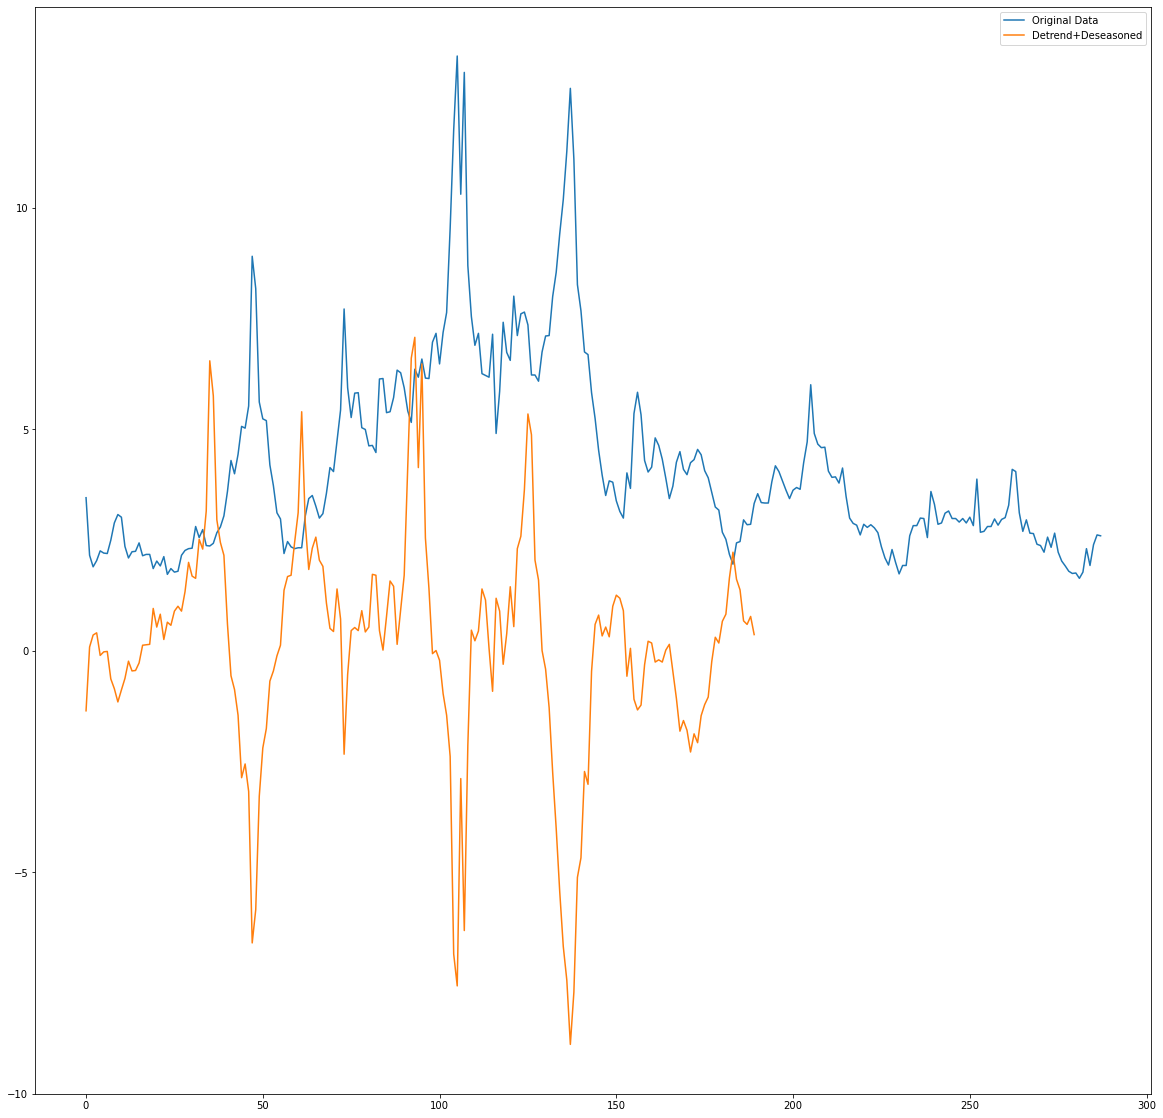

In [19]:
# De-seasonalize the data

df_final=difference(train['Price'],12)
#df_deseasoned=difference(train['Price'],12)

plt.plot(data.Price.values,label='Original Data')
#plt.plot(df_deseasoned, label = 'Deseasoned')
plt.plot(df_final, label = 'Detrend+Deseasoned')
plt.legend()

In [20]:
'''# De-seasonalize the data

df_final_1=difference(df_final,12)
#df_deseasoned=difference(train['Price'],12)

plt.plot(data.Price.values,label='Original Data')
#plt.plot(df_deseasoned, label = 'Deseasoned')
plt.plot(df_final_1, label = 'Detrend+Deseasoned')
plt.legend()'''

"# De-seasonalize the data\n\ndf_final_1=difference(df_final,12)\n#df_deseasoned=difference(train['Price'],12)\n\nplt.plot(data.Price.values,label='Original Data')\n#plt.plot(df_deseasoned, label = 'Deseasoned')\nplt.plot(df_final_1, label = 'Detrend+Deseasoned')\nplt.legend()"

In [21]:
# Testing for stationarity on detrended data
from statsmodels.tsa.stattools import adfuller, kpss

# H0: Not stationary
# Ha: Stationary
# ADF Test
result = adfuller(df_final, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value<0.05, hence accept null hypothesis, data is stationary

# H0: Stationary
# Ha: Not Stationary
# KPSS Test - Trend Stationarity
result = kpss(df_final, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value>0.05, hence reject null hypothesis, data is stationary

ADF Statistic: -3.5322091611489914
p-value: 0.007197415670309528
Critial Values:
   1%, -3.4685016947910636
Critial Values:
   5%, -2.8782983668563396
Critial Values:
   10%, -2.57570415906989

KPSS Statistic: 0.160733
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# ACF and PACF Plots

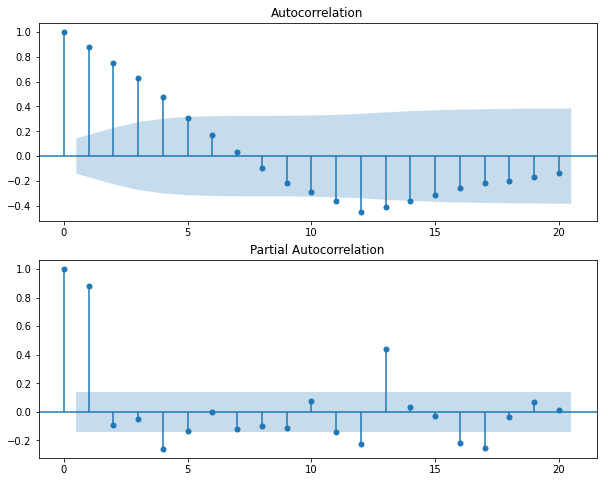

In [22]:
fig=plt.figure(figsize=(10,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df_final,lags=20,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df_final,lags=20,ax=ax2)

# ACF is gradual and PACF is sudden. Hence it is AR(p) model with p = 1 from PACF plot

# Auto ARIMA

In [23]:
import pmdarima as pm

In [24]:
myfit = pm.auto_arima(train['Price'], m=12,seasonal=True,trace=True, start_p = 0, start_q = 0, d=0,D=1,
                      error_action='ignore', # don't want to know if an order does not work
                      suppress_warnings=True, # don't want convergence warnings
                      stepwise=True) 

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=856.508, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=897.289, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=569.553, Time=0.53 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=702.212, Time=0.66 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=895.444, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=617.425, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=548.943, Time=1.54 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.78 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.95 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=853.235, Time=1.00 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=550.098, Time=1.44 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=550.141, Time=1.55 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=701.228, Time=1.59 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=550.750, Time=3.13 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AI

# ARIMA

In [25]:
# Parameters from Acf,Pacf plots
#model=sm.tsa.arima.ARIMA(train['Price'],order=(1,0,0),seasonal_order = (0,1,0,12))
# Paramaters From AutoARIMA
model=sm.tsa.arima.ARIMA(train['Price'],order=(1,0,0),seasonal_order = (2,1,0,12))

model_res=model.fit()

print(model_res.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Price   No. Observations:                  202
Model:             ARIMA(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -269.479
Date:                          Wed, 04 May 2022   AIC                            546.958
Time:                                  12:37:02   BIC                            559.946
Sample:                                       0   HQIC                           552.219
                                          - 202                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8974      0.019     46.059      0.000       0.859       0.936
ar.S.L12      -0.6361      0.056    -11.429      0.

In [26]:
tspredict= model_res.predict(50)

tsforecast=model_res.forecast(86)

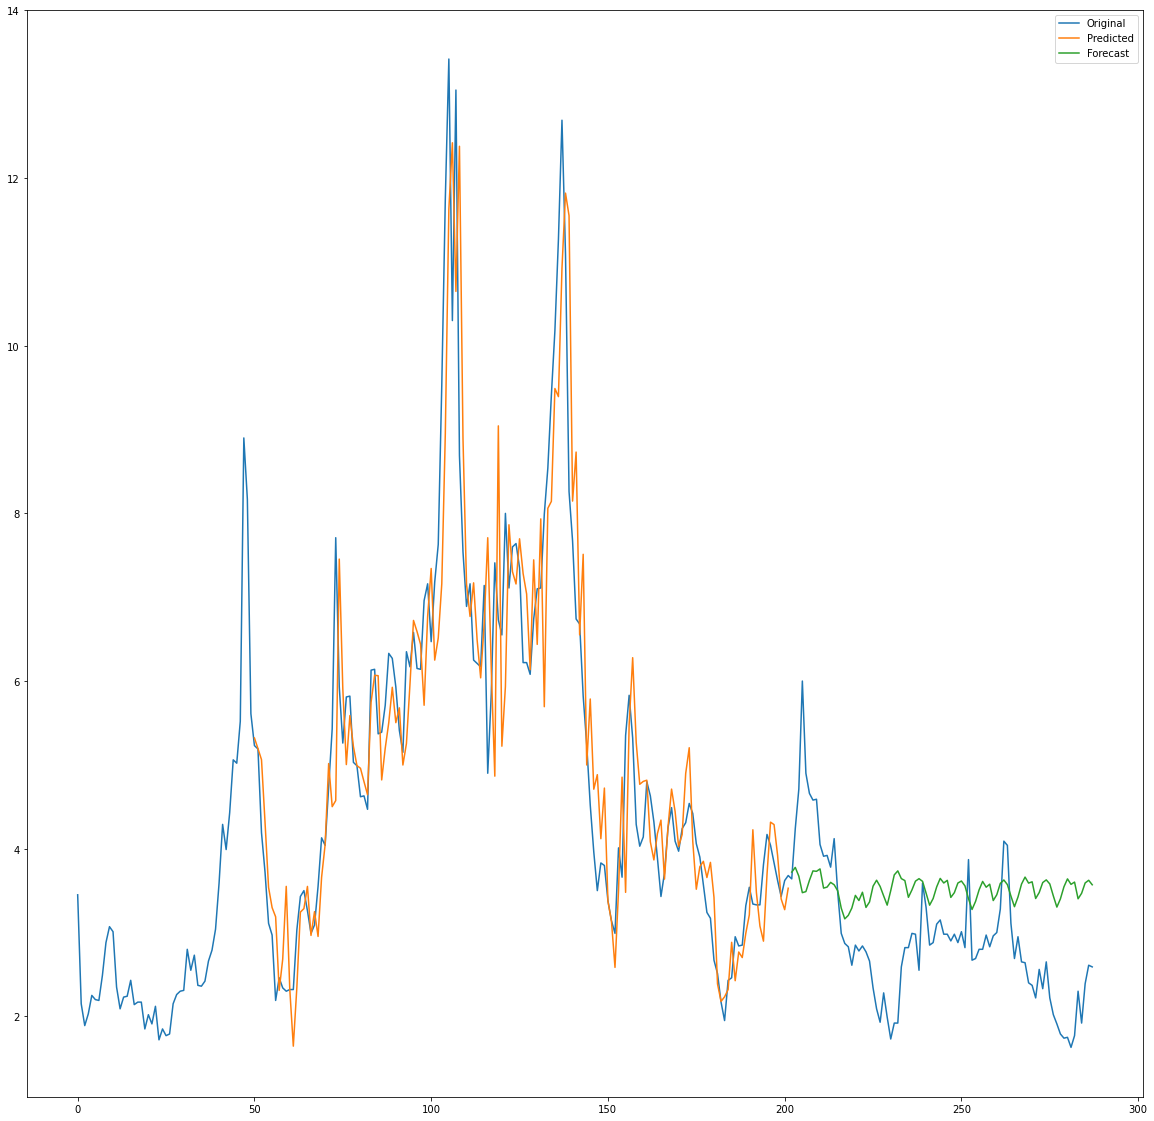

In [27]:
plt.plot(data['Price'], label='Original')
plt.plot(tspredict, label='Predicted')
plt.plot(tsforecast, label='Forecast')
plt.legend()

In [28]:
rmse = mean_squared_error(test['Price'], model_res.forecast(86), squared=False)
rmse

1.0008347785094034

# Holt

In [29]:
from statsmodels.tsa.holtwinters import Holt

In [30]:
model = Holt(train['Price'], exponential=True)

result = model.fit()

C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [31]:
result.params

{'smoothing_level': 0.9844885922217707,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3.4726627029925825,
 'initial_trend': 0.9879064374101115,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [32]:
result.summary()

Dep. Variable:,Price,No. Observations:,202
Model:,Holt,SSE,140.474
Optimized:,True,AIC,-65.376
Trend:,Multiplicative,BIC,-52.143
Seasonal:,None,AICC,-64.945
Seasonal Periods:,None,Date:,"Wed, 04 May 2022"
Box-Cox:,False,Time:,12:37:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9844886,alpha,True
smoothing_trend,0.000000,beta,True


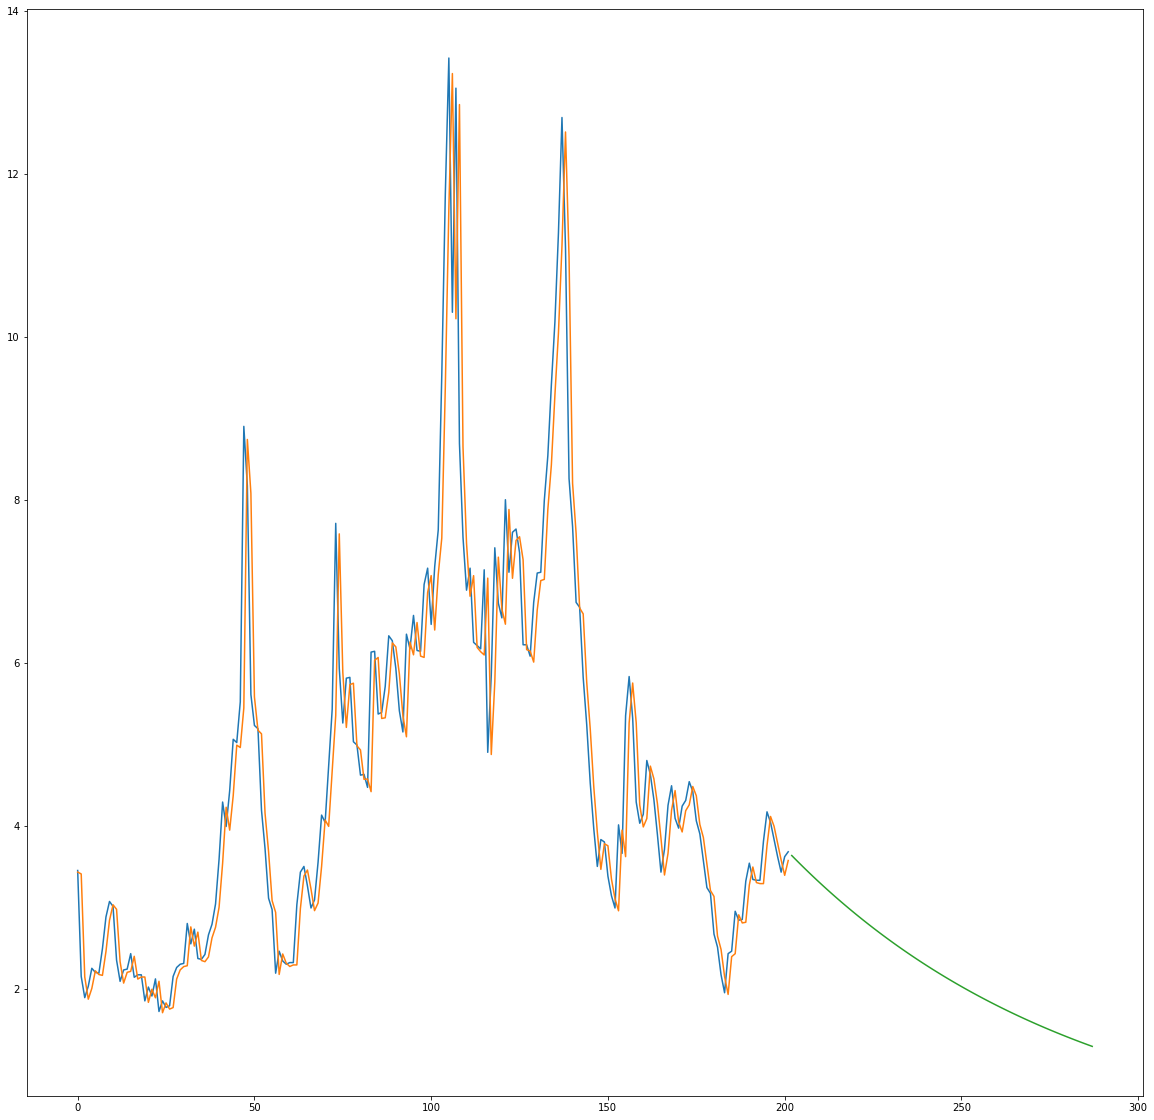

In [33]:
plt.plot(train['Price'])
plt.plot(result.fittedvalues)
plt.plot(result.forecast(86))

In [34]:
rmse = mean_squared_error(test['Price'], result.forecast(86), squared=False)
rmse

0.9353886476277545

# Exponential Smoothing

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [36]:
model = ExponentialSmoothing(train['Price'], seasonal='additive', seasonal_periods=12)

C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [37]:
result3 = model.fit()
result3.params

{'smoothing_level': 0.9999999850987952,
 'smoothing_trend': nan,
 'smoothing_seasonal': 2.53556671787109e-09,
 'damping_trend': nan,
 'initial_level': 5.593641200482612,
 'initial_trend': nan,
 'initial_seasons': array([-2.1436176 , -2.32180335, -2.49702357, -2.35932497, -2.28926148,
        -2.1474664 , -2.4468315 , -2.49911917, -2.57729379, -2.2619053 ,
        -2.37000243, -1.85806377]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [38]:
result3.summary()

Dep. Variable:,Price,No. Observations:,202
Model:,ExponentialSmoothing,SSE,130.522
Optimized:,True,AIC,-60.219
Trend:,None,BIC,-13.903
Seasonal:,Additive,AICC,-57.278
Seasonal Periods:,12,Date:,"Wed, 04 May 2022"
Box-Cox:,False,Time:,12:37:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_seasonal,2.5356e-09,gamma,True


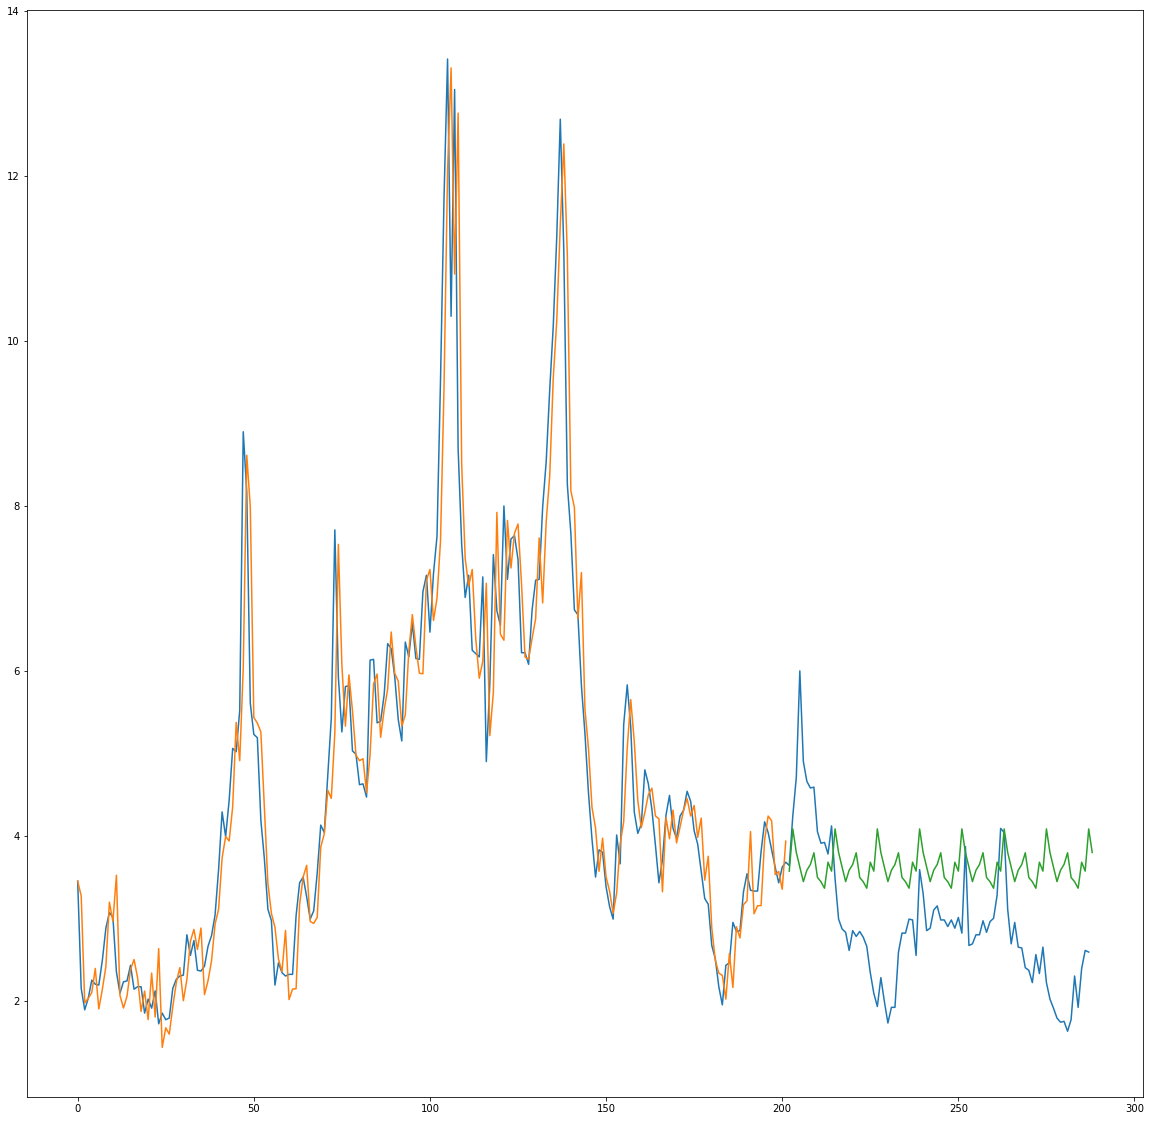

In [39]:
plt.plot(data['Price'])
plt.plot(result3.fittedvalues)
plt.plot(result3.forecast(87))

In [40]:
rmse = mean_squared_error(test['Price'], result3.forecast(86), squared=False)
rmse

1.0885672328420979